In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import string
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

# Read UniProt

In [2]:
cd = os.getcwd()
cd

'/Users/lisamarieboatner/Dropbox/GitHub/iaa_statistics/figure_scripts'

In [3]:
# os.chdir(cd)
# os.chdir('../')
# os.chdir('uniprot/data/230109')

In [4]:
# u_df = pd.read_csv('2301_uniprot_annotated.csv')
u_df = pd.read_csv('https://www.dropbox.com/s/2o3nbqhf3pjpt4j/230316_2301_uniprot_annotated.csv?dl=1')
u_df = u_df.drop_duplicates()
u_df.shape

/Users/lisamarieboatner/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (22,24,26,32,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(20404, 81)

In [5]:
tmp = u_df.copy()
u_protein_ids = len(tmp['Entry'].unique())
u_protein_ids

20404

# Read Dataset

In [6]:
# os.chdir(cd)
# os.chdir('../')
# os.chdir('isotop/data')
# i_df = pd.read_csv('220505_isotop.csv')
i_df = pd.read_csv('https://www.dropbox.com/s/8ddw28tmxpwtj1b/220505_isotop_pdb.csv?dl=1')

## Add PDBs to Experimental Data

In [7]:
i_merged = pd.merge(i_df, u_df[['Entry', 'PDB', 'Classification']], left_on = 'protein', right_on = 'Entry', how = 'left')

In [8]:
i_merged.head()

,identifier,protein,description,peptides,gene,2022_count,2019_count,2010_count,experiment_count,isotop-3_median,...,isotop-21_median,isotop-22_median,isotop-23_median,isotop-24_median,mean,sd,pdb,Entry,PDB,Classification
0,Q5SRE5_C9,Q5SRE5,Nucleoporin NUP188 homolog,AAAAGGPC*VR,NUP188,13.0,NaN,NaN,13,3.537341,...,NaN,NaN,NaN,NaN,2.888758,0.777620,5IJO;,Q5SRE5,5IJO;7R5K;,"Chaperone, Transporter, Channel, Receptor"
1,Q9NRL3_C17,Q9NRL3,Striatin-4,AAAAVAAAASSC*RPLGSGAGPGPTGAAPVSAPAPGPGPAGK,STRN4,7.0,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,4.871786,1.679853,NaN,Q9NRL3,NaN,"Scaffolding, Modulator, Adaptor"
2,Q96C19_C172,Q96C19,EF-hand domain-containing protein D2,KAAAGELQEDSGLC*VLAR;AAAGELQEDSGLC*VLAR,EFHD2,13.0,5.0,1.0,19,2.250133,...,NaN,NaN,NaN,NaN,2.377649,1.301613,5H0P;5I2L;5I2O;5I2Q;,Q96C19,5H0P;5I2L;5I2O;5I2Q;,Nucleic Acid and Small Molecule Binding
3,P0DMV8_C17,P0DMV8,Heat shock 70 kDa protein 1A,AAAIGIDLGTTYSC*VGVFQHGK;AAAIGIDLGTTYSC*VGVFQHG...,HSPA1A,13.0,NaN,NaN,13,10.980129,...,NaN,NaN,NaN,NaN,6.718041,3.760279,1HJO;1S3X;1XQS;2E88;2E8A;2LMG;3A8Y;3ATU;3ATV;3...,P0DMV8,1HJO;1S3X;1XQS;2E88;2E8A;2LMG;3A8Y;3ATU;3ATV;3...,"Chaperone, Transporter, Channel, Receptor"
4,P20810_C408,P20810,Calpastatin,AAAPAPVSEAVC*R,CAST,13.0,NaN,NaN,13,3.719817,...,NaN,NaN,NaN,NaN,3.621821,0.852873,NaN,P20810,NaN,Enzyme


In [9]:
i_df.shape, i_merged.shape

((9783, 36), (9783, 39))

## Add Proteins to UniProt

In [10]:
subset_i_df = i_df[['protein']]
subset_i_df = subset_i_df.drop_duplicates()
i_df.shape, subset_i_df.shape

((9783, 36), (3974, 1))

In [11]:
subset_u_df = tmp[[
 'Entry', 
 'Classification',
 'Involvement in disease',
 'PDB',
 'DrugBank',
 'ChEMBL',
#  'HPA_found',
 'Active site',                 
 'Involvement in disease',
 'FDA',                 
 'Protein class',
 'Keywords',
 'chaperone_transporter_channel_receptor',
 'enzyme',
 'nucleic_acid_and_small_molecule_binding',
 'scaffolding_modulator_adaptor',
 'transcriptional_factor_regulator'
]]

In [12]:
subset_u_df = subset_u_df.drop_duplicates()
subset_u_df_duplicate = subset_u_df[subset_u_df['Entry'].duplicated()]

In [13]:
u_merged = subset_i_df.merge(subset_u_df, left_on='protein', right_on='Entry', how='left')

In [14]:
u_merged.head()

,protein,Entry,Classification,Involvement in disease,PDB,DrugBank,ChEMBL,Active site,Involvement in disease,FDA,Protein class,Keywords,chaperone_transporter_channel_receptor,enzyme,nucleic_acid_and_small_molecule_binding,scaffolding_modulator_adaptor,transcriptional_factor_regulator
0,Q5SRE5,Q5SRE5,"Chaperone, Transporter, Channel, Receptor",DISEASE: Note=Copy number variations of NUP188...,5IJO;7R5K;,NaN,NaN,NaN,DISEASE: Note=Copy number variations of NUP188...,NaN,"Disease related genes, Metabolic proteins, Pot...",3D-structure;Acetylation;Alternative splicing;...,yes,NaN,NaN,NaN,NaN
1,Q9NRL3,Q9NRL3,"Scaffolding, Modulator, Adaptor",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Predicted intracellular proteins, Predicted me...",Alternative splicing;Calmodulin-binding;Cell p...,NaN,NaN,NaN,yes,NaN
2,Q96C19,Q96C19,Nucleic Acid and Small Molecule Binding,NaN,5H0P;5I2L;5I2O;5I2Q;,NaN,NaN,NaN,NaN,NaN,Predicted intracellular proteins,3D-structure;Acetylation;Calcium;Direct protei...,NaN,NaN,yes,NaN,NaN
3,P0DMV8,P0DMV8,"Chaperone, Transporter, Channel, Receptor",DISEASE: Note=In certain aggressive cases of a...,1HJO;1S3X;1XQS;2E88;2E8A;2LMG;3A8Y;3ATU;3ATV;3...,NaN,CHEMBL5460;,NaN,DISEASE: Note=In certain aggressive cases of a...,NaN,"Disease related genes, Predicted intracellular...",3D-structure;Acetylation;Alternative splicing;...,yes,NaN,yes,NaN,yes
4,P20810,P20810,Enzyme,"DISEASE: Peeling skin with leukonychia, acral ...",NaN,DB11638;DB01373;,NaN,NaN,"DISEASE: Peeling skin with leukonychia, acral ...",NaN,"Cancer-related genes, Disease related genes, H...",Acetylation;Alternative splicing;Isopeptide bo...,NaN,yes,NaN,NaN,NaN


# Preprocessing

# Uniprot unique cysteines and proteins with and without PDBs

In [15]:
# found via script for aa frequency in 2301_uniprot.fasta
u_cysteine_ids = 261781

In [16]:
u_protein_ids = list(u_df['Entry'].unique())

In [17]:
u_pdb = u_df[u_df['PDB'].notna()]
u_protein_pdb_ids = list(u_pdb['Entry'].unique())

In [18]:
u_no_pdb = u_df[u_df['PDB'].isna() == True]
u_protein_no_pdb_ids = list(u_pdb['Entry'].unique())

# Unique reactive cysteines and proteins with PDBs

In [19]:
cysteine_ids = list(i_df['identifier'].unique())
protein_ids = list(i_df['protein'].unique())

In [20]:
i_pdb = i_merged[i_merged['PDB'].notna()]
cysteine_pdb_ids = list(i_pdb['identifier'].unique())
protein_pdb_ids = list(i_pdb['protein'].unique())

In [21]:
i_no_pdb = i_merged[i_merged['PDB'].isna() == True]
cysteine_no_pdb_ids = list(i_no_pdb['identifier'].unique())
protein_no_pdb_ids = list(i_no_pdb['protein'].unique())

In [22]:
len(cysteine_ids), len(cysteine_pdb_ids), len(protein_ids), len(protein_pdb_ids), len(protein_no_pdb_ids)

(9783, 6882, 3974, 2636, 1338)

2022 (9783, 6707, 3974, 2558)

In [23]:
i_df[i_df['mean'] <= 2.3]

,identifier,protein,description,peptides,gene,2022_count,2019_count,2010_count,experiment_count,isotop-3_median,...,isotop-18_median,isotop-19_median,isotop-20_median,isotop-21_median,isotop-22_median,isotop-23_median,isotop-24_median,mean,sd,pdb
6,O95336_C32,O95336,6-phosphogluconolactonase,AAC*CLAGAR,PGLS,12.0,NaN,6.0,18,1.465773,...,NaN,1.92,2.05,1.45,1.38,1.40,2.17,1.319985,0.464120,NaN
28,Q8NEC7_C140,Q8NEC7,Glutathione S-transferase C-terminal domain-co...,AC*AEVSQWTR,GSTCD,13.0,1.0,2.0,16,1.309328,...,NaN,1.22,1.05,NaN,NaN,NaN,NaN,1.055379,0.208989,NaN
32,P35658_C728,P35658,Nuclear pore complex protein Nup214,AC*FQVGTSEEMK,NUP214,13.0,4.0,2.0,19,2.429867,...,0.998925,3.01,2.15,NaN,NaN,NaN,NaN,1.632279,0.701243,2OIT;3FHC;3FMO;3FMP;5DIS;
58,Q14683_C1210,Q14683,Structural maintenance of chromosomes protein 1A,AESLIGVYPEQGDC*VISK,SMC1A,6.0,1.0,NaN,7,3.143214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.840757,1.079782,6WG3;6WG4;6WG6;6WGE;
63,Q9H479_C24,Q9H479,Fructosamine-3-kinase,AFGGPGAGC*ISEGR,FN3K,9.0,NaN,NaN,9,2.049314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.496780,0.542262,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9735,Q92599_C271,Q92599,SEPT8 Septin-8,QYPWGVVQVENENHC*DFVK,NaN,NaN,NaN,3.0,3,NaN,...,NaN,0.28,1.48,1.27,NaN,NaN,NaN,1.010000,0.640859,6UPR;6WSM;
9742,Q96NY7_C487,Q96NY7,CLIC6 Chloride intracellular channel protein 6,AGYDGESIGNC*PFSQR,NaN,NaN,NaN,6.0,6,NaN,...,NaN,2.26,1.88,2.08,2.29,2.01,2.12,2.106667,0.154100,NaN
9750,Q9BRT3_C33,Q9BRT3,C17orf37 Protein C17orf37,IVVEYCEPC*GFEATYLELASAVK,NaN,NaN,NaN,2.0,2,NaN,...,NaN,2.55,1.95,NaN,NaN,NaN,NaN,2.250000,0.424264,2LJK;
9760,Q9H0W8_C380,Q9H0W8,SMG9 Protein SMG9,REDFC*PR,NaN,NaN,NaN,2.0,2,NaN,...,NaN,1.62,1.00,NaN,NaN,NaN,NaN,1.310000,0.438406,6L54;6SYT;6Z3R;


In [24]:
date = '240523'

In [25]:
# os.chdir(cd)
# os.chdir('../')
# os.chdir('isotop')
# os.chdir('figure_1')

# Grouped bar

In [26]:
a = 'UniProtKB/Swiss-Prot'
b = 'UniProtKB/Swiss-Prot\nwith PDB         '
c = 'IAA Labeled'
d = 'IAA Labeled\nwith PDB  '

palette = {
    a: "grey",
    b: "darkgrey",
    c: 'darkslateblue',
    d: 'mediumslateblue'
#     c: 'steelblue',
#     d: 'skyblue'
}

graph_df = pd.DataFrame([
                   [a, 'UniProt Unique Proteins', len(u_protein_ids)],
                   [b, 'UniProt with PDB Unique Proteins', len(u_protein_pdb_ids)],
                   [c, 'Reactivity Unique Proteins', len(protein_ids)-5],
                   [d, 'Reactivity Dataset with PDB Unique Proteins', len(protein_pdb_ids)]],
                   columns=['Group','Source','Count'])

In [27]:
def get_grouped_bar():
    fig, ax = plt.subplots(figsize =(15, 20))

    p = sns.barplot(data=graph_df, x = 'Count', y='Group', palette = palette, orient = 'h')
    
    p.set(ylabel = '', xlabel = 'No. of Unique Proteins')

    p.set_yticklabels(p.get_ymajorticklabels(), fontsize = 40)
    p.set_xticklabels(p.get_xticks().astype(int), fontsize = 25)

    p.xaxis.label.set_size(40)

    
    for p in ax.patches:
        width = p.get_width()   
        ax.text(width * 0.98,       
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width), 
            ha = 'right',  
            va = 'center',
            size = 35,
            color = 'white') 

    plt.savefig(date + '_figure_1_a_bar_purple.png', dpi = 300, bbox_inches = "tight")
    
    plt.show()

/var/folders/kp/78ttbq6n3cxcn3kddjvbpygr0000gn/T/ipykernel_56482/674923556.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticks().astype(int), fontsize = 25)


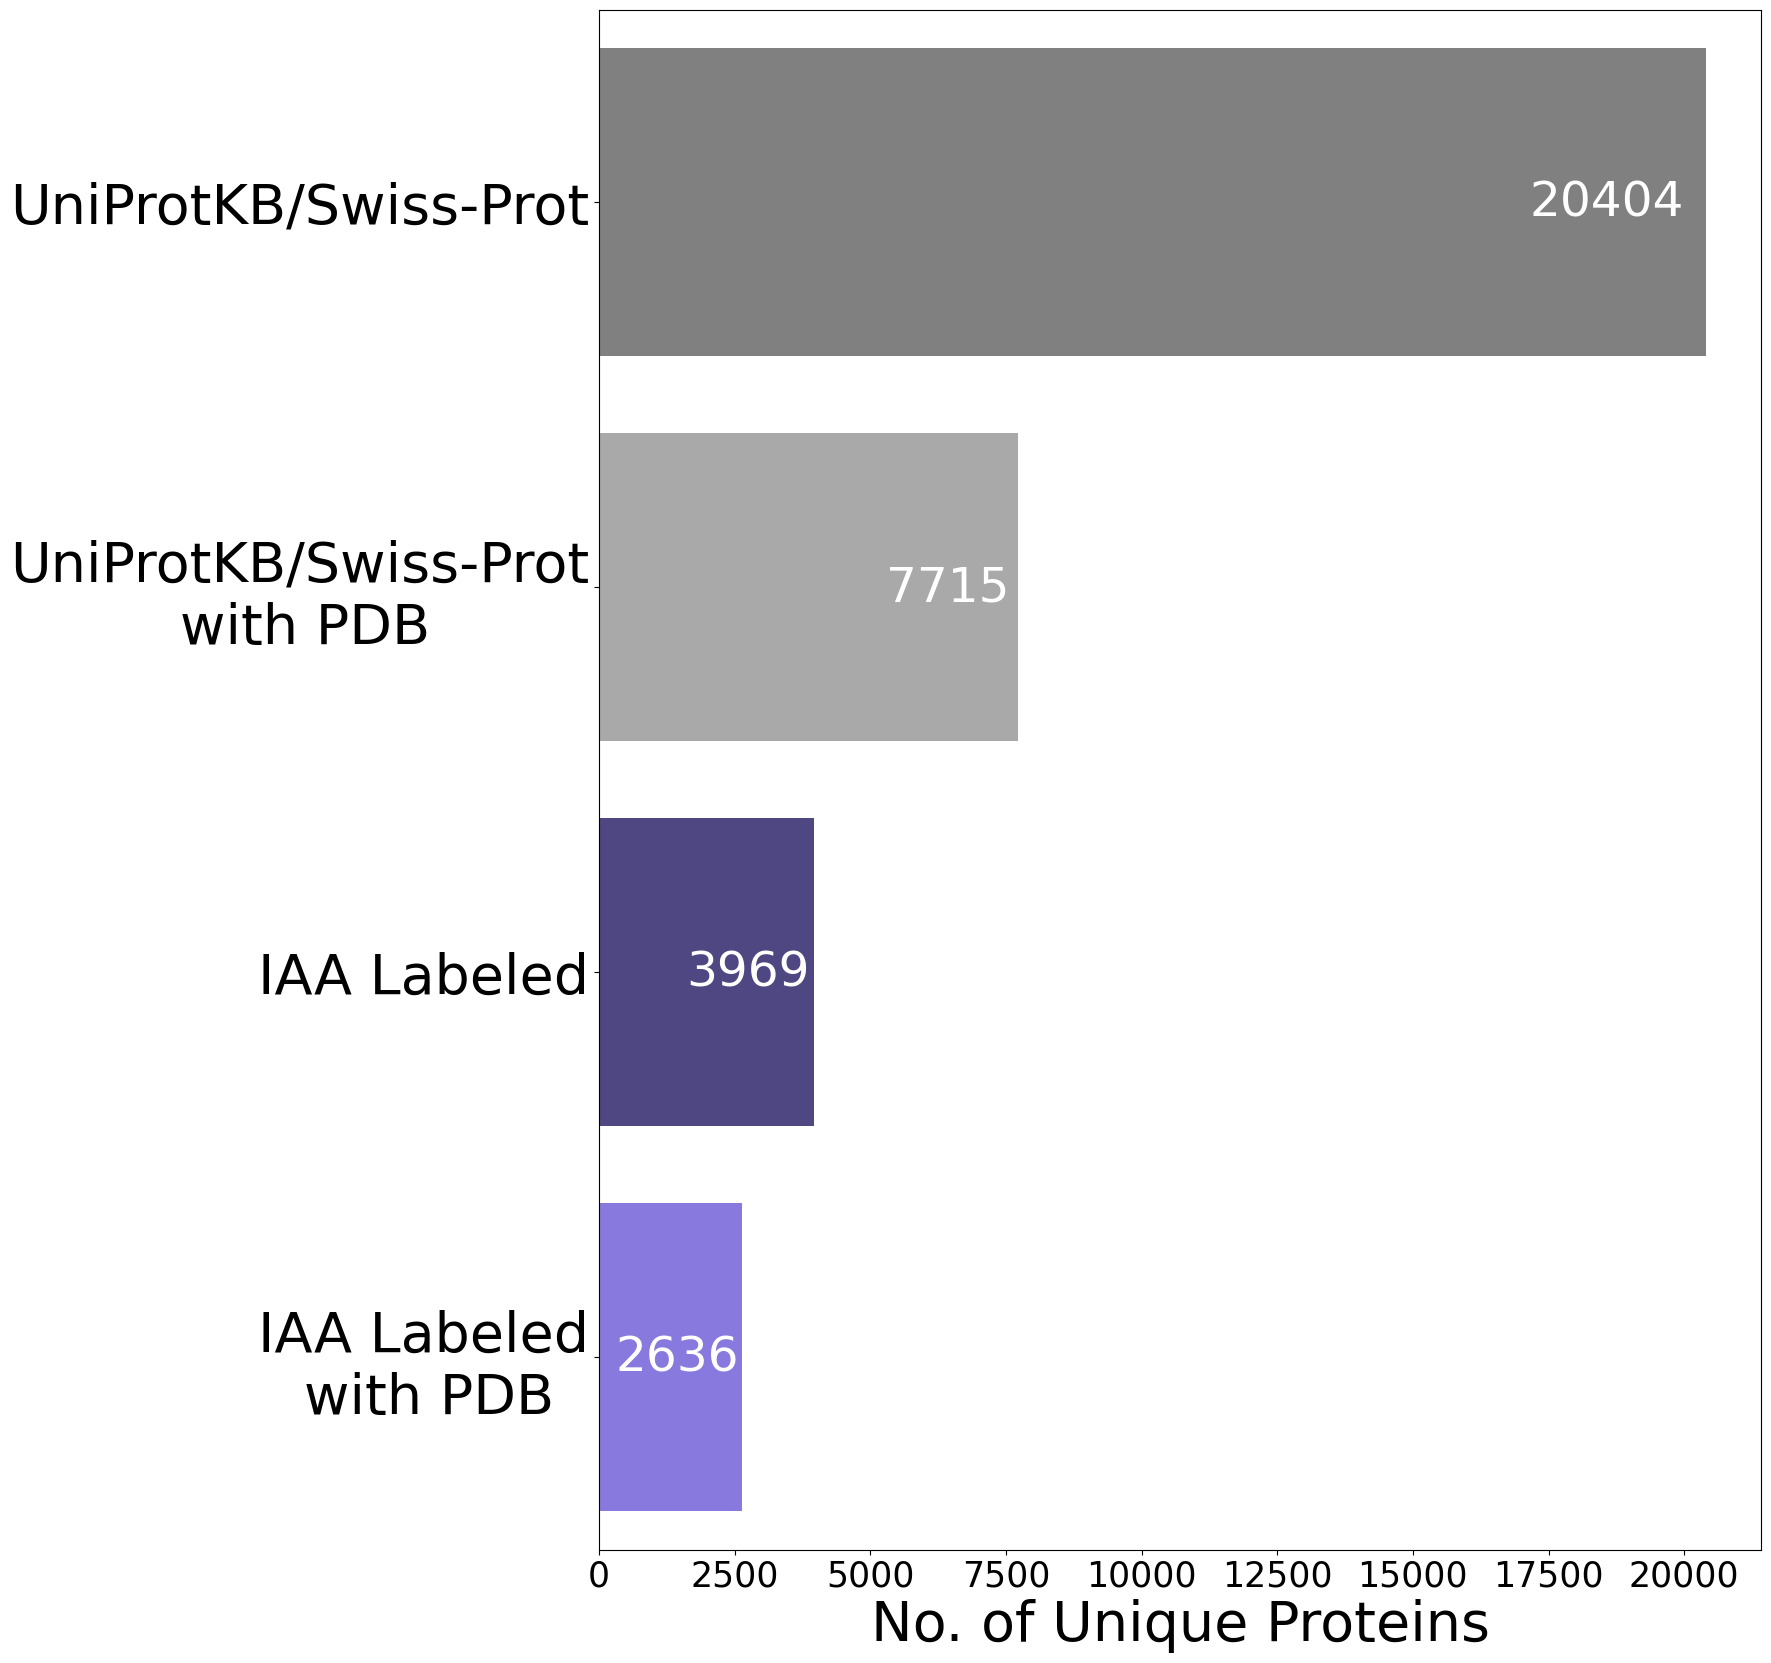

In [41]:
get_grouped_bar()

/var/folders/kp/78ttbq6n3cxcn3kddjvbpygr0000gn/T/ipykernel_56482/712601424.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticks().astype(int), fontsize = 25)


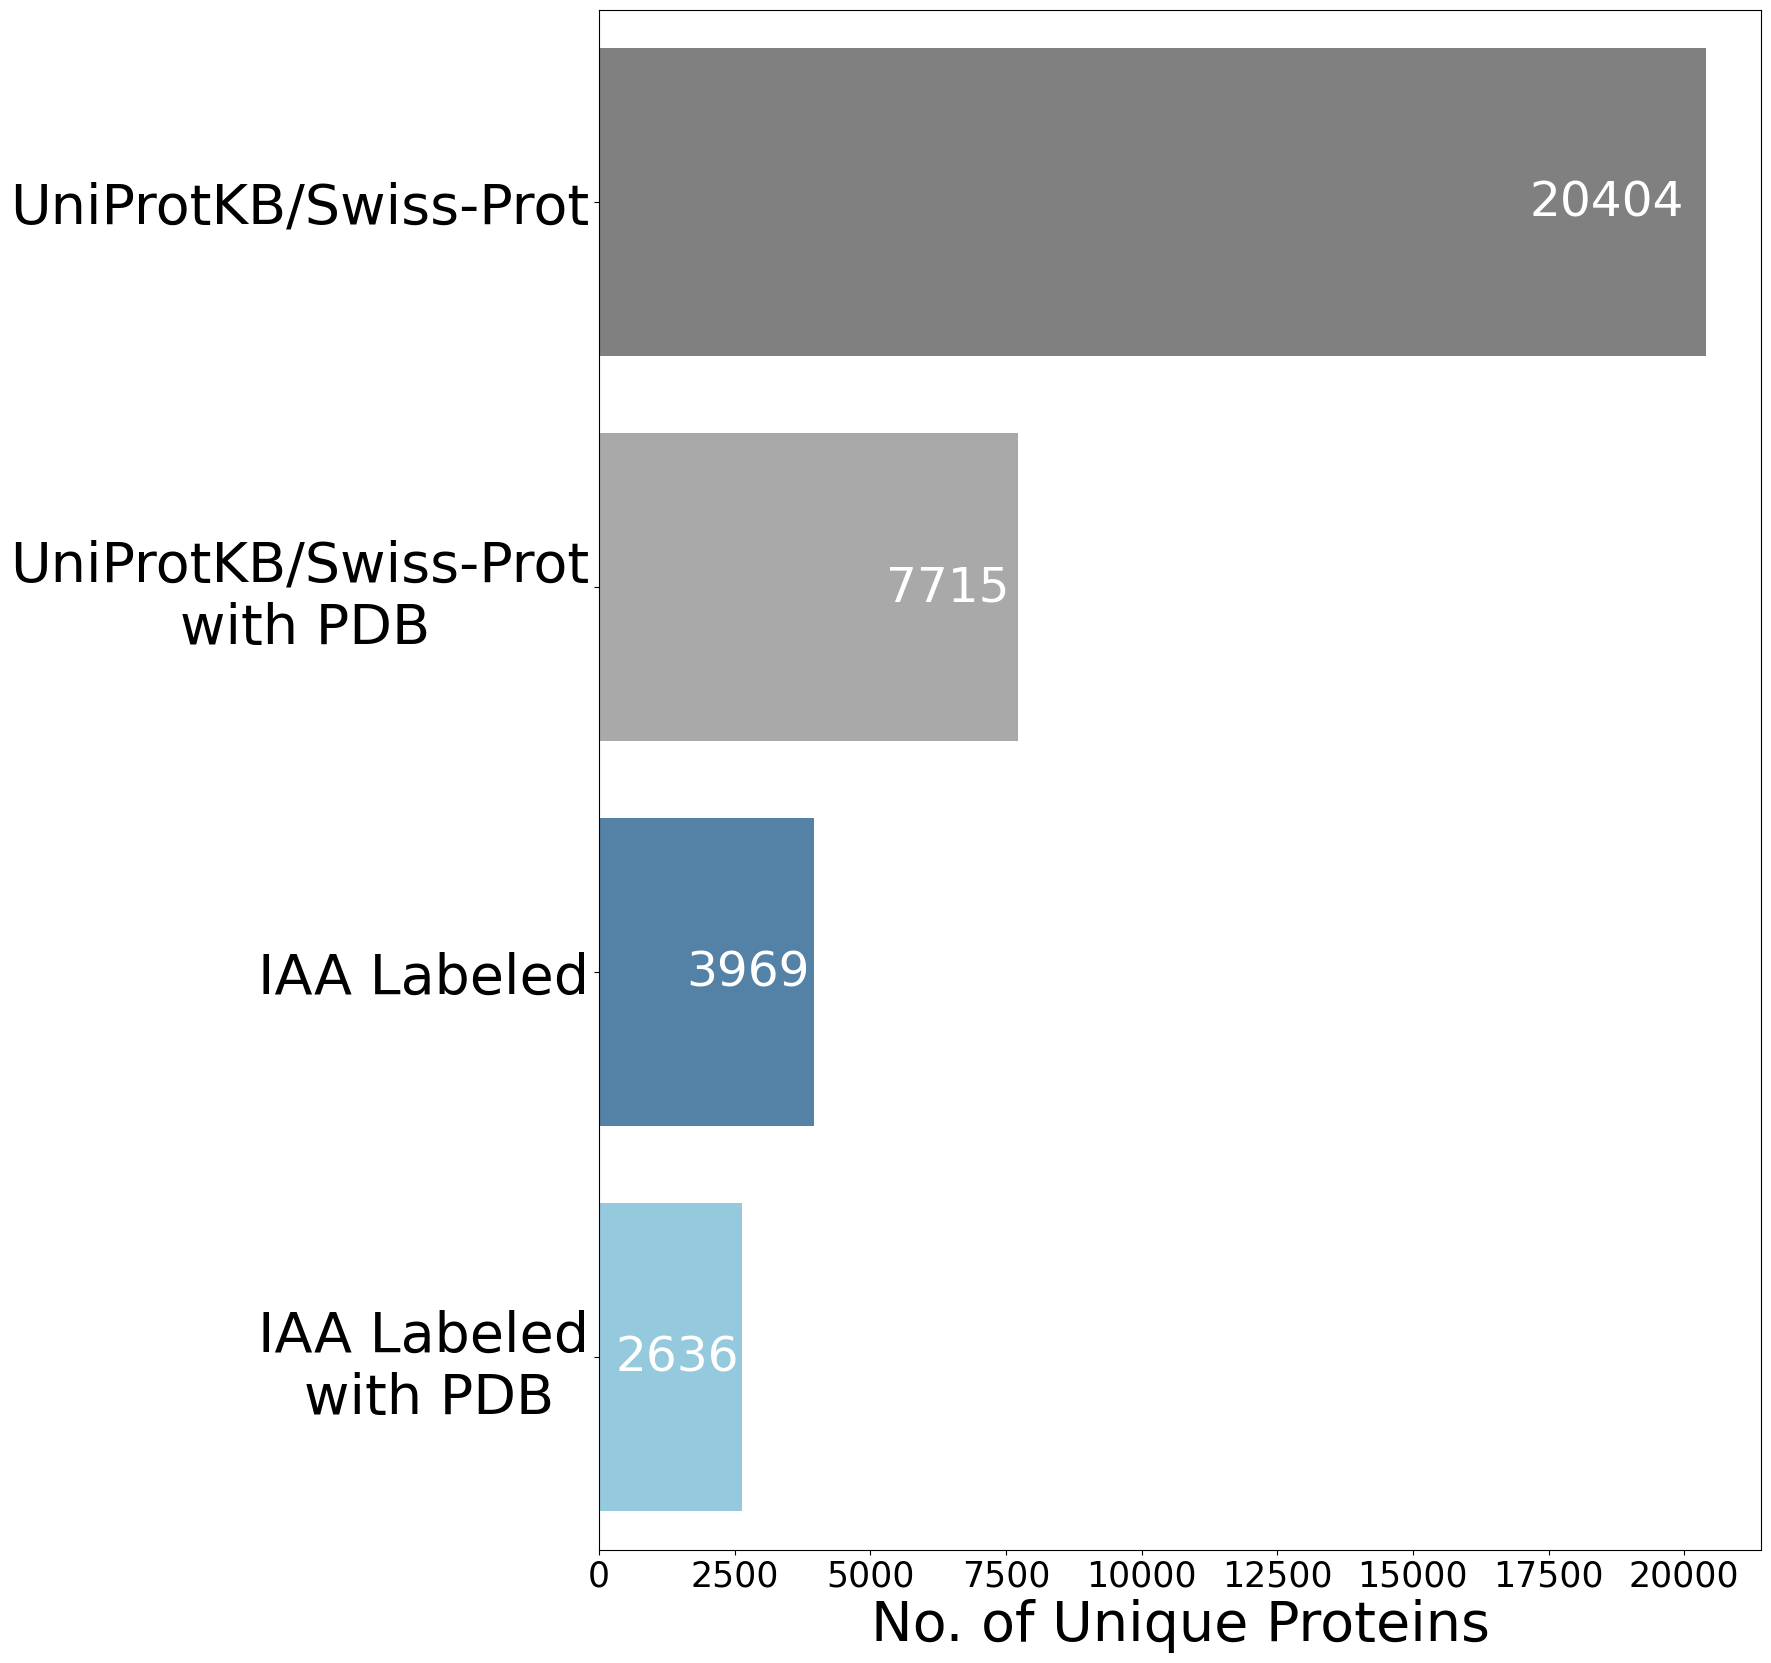

In [31]:
# get_grouped_bar()

# PDB

In [28]:
palette = {
           "Enzyme":"goldenrod", 
           "Chaperone, Transporter, Channel, Receptor":"forestgreen",
           "Transcriptional Factor, Regulator": "teal",
           "Scaffolding, Modulator, Adaptor":"darkorange",
           "Nucleic Acid and Small Molecule Binding": "firebrick",
           "Uncategorized": "grey"
}

In [29]:
def get_new_pie_chart(labels, values, name, title):

    #create pie chart
    fig = plt.figure(figsize =(15, 10))

    labels = labels
    data = values
    
    cmap = plt.cm.tab20b
    colors = cmap(np.linspace(0., 0.5, len(data)))

#     plt.pie(data, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }, labels = labels, labeldistance = None)
    plt.legend(loc = "best", frameon = False)
    
    plt.pie(data, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
    plt.tight_layout()
    plt.title(title, size = 50)

    plt.savefig(name + '.png', dpi = 300, bbox_inches = "tight")
    plt.show()

In [30]:
pdb = subset_u_df[subset_u_df['PDB'].notna()]

In [31]:
pdb_u_proteins = (pdb.shape[0]/subset_u_df.shape[0]) * 100
pdb_u_proteins = round(pdb_u_proteins, 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


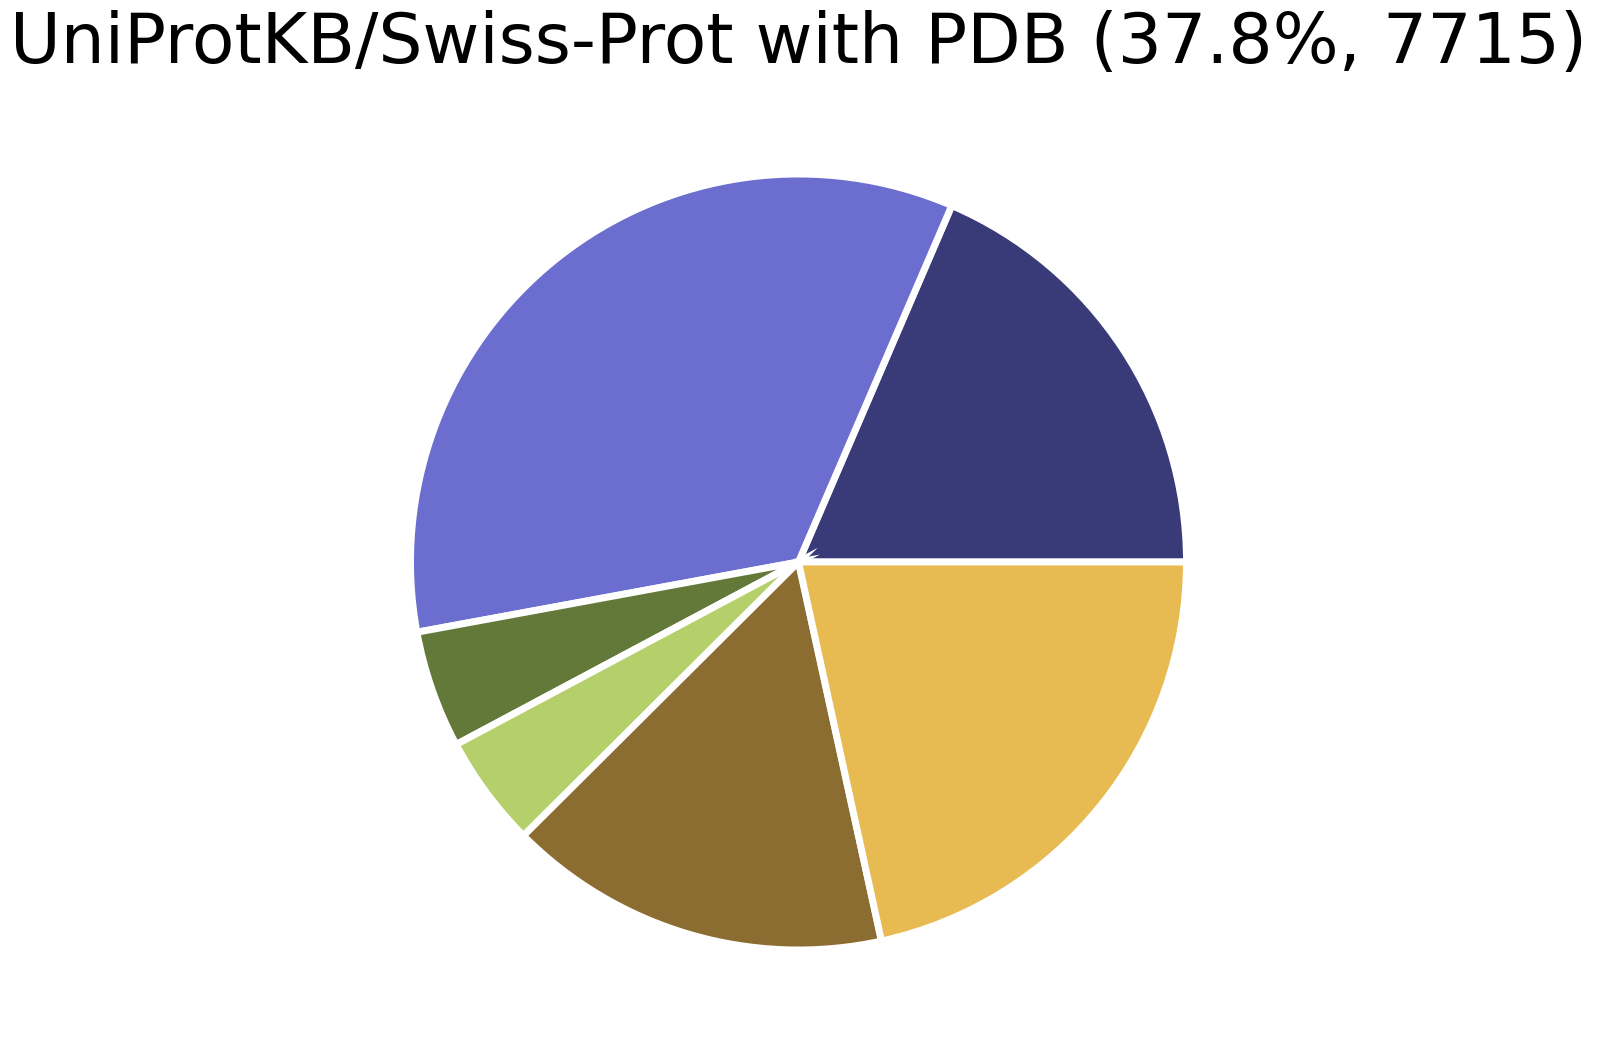

In [58]:
name = date + '_pie_total_pdb_kw_descr_minus_tf_white_5'
title = 'UniProtKB/Swiss-Prot with PDB (' + str(pdb_u_proteins) + '%, ' + str(pdb.shape[0]) + ')'
fig_df = pdb.copy()
labels = sorted(list(fig_df['Classification'].value_counts().index))
values = list(fig_df['Classification'].value_counts().sort_index())
get_new_pie_chart(labels, values, name, title)

In [59]:
labels, values

(['Chaperone, Transporter, Channel, Receptor',
  'Enzyme',
  'Nucleic Acid and Small Molecule Binding',
  'Scaffolding, Modulator, Adaptor',
  'Transcriptional Factor, Regulator',
  'Uncategorized'],
 [1430, 2651, 378, 360, 1232, 1664])

In [32]:
no_pdb = subset_u_df[subset_u_df['PDB'].isna() == True]

In [33]:
no_pdb_u_proteins = (no_pdb.shape[0]/subset_u_df.shape[0]) * 100
no_pdb_u_proteins = round(no_pdb_u_proteins, 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


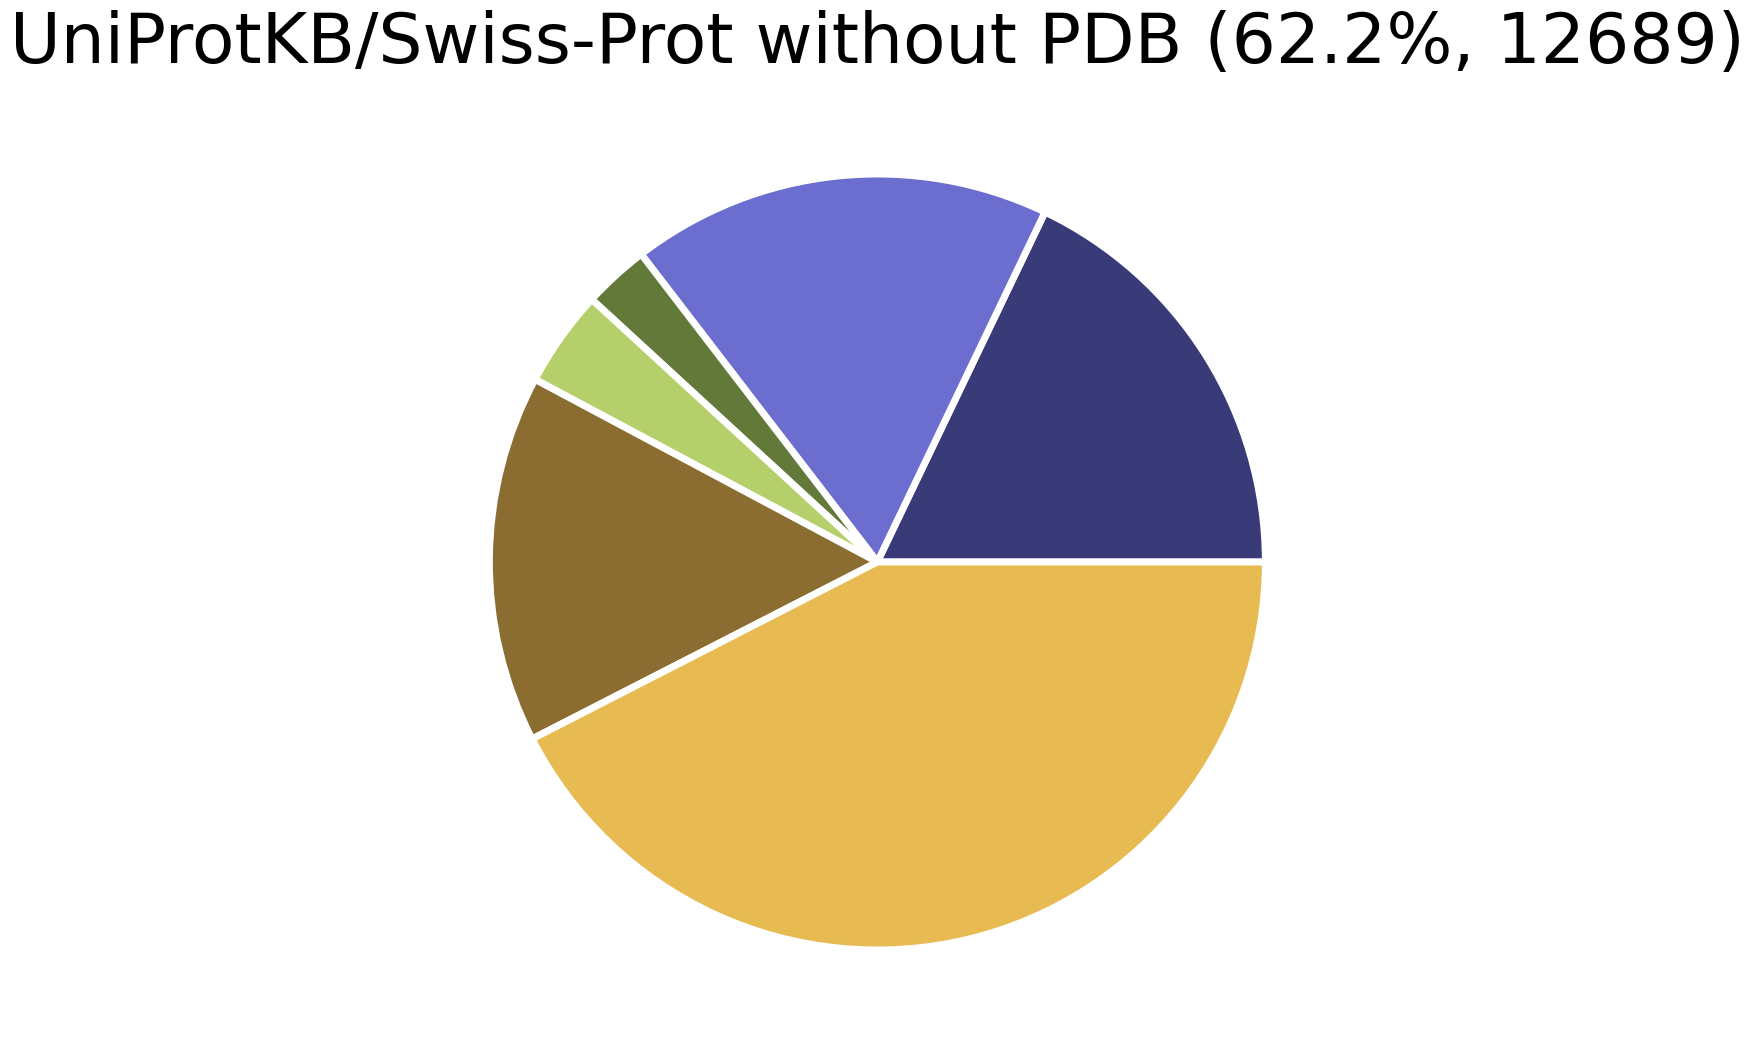

In [64]:
name = date + '_pie_total_no_pdb_kw_descr_minus_tf_white_5'
title = 'UniProtKB/Swiss-Prot without PDB (' + str(no_pdb_u_proteins) + '%, ' + str(no_pdb.shape[0]) + ')'
fig_df = no_pdb.copy()
labels = sorted(list(fig_df['Classification'].value_counts().index))
values = list(fig_df['Classification'].value_counts().sort_index())
get_new_pie_chart(labels, values, name, title)

In [34]:
i_pdb = i_merged[i_merged['PDB'].notna()]
i_pdb_proteins = len(list(i_pdb['protein'].drop_duplicates()))
# i_pdb.to_csv('i_pdb_proteins.csv')

In [35]:
i_pdb_u_proteins = (len(protein_pdb_ids)/len(protein_ids)) * 100
i_pdb_u_proteins = round(i_pdb_u_proteins, 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


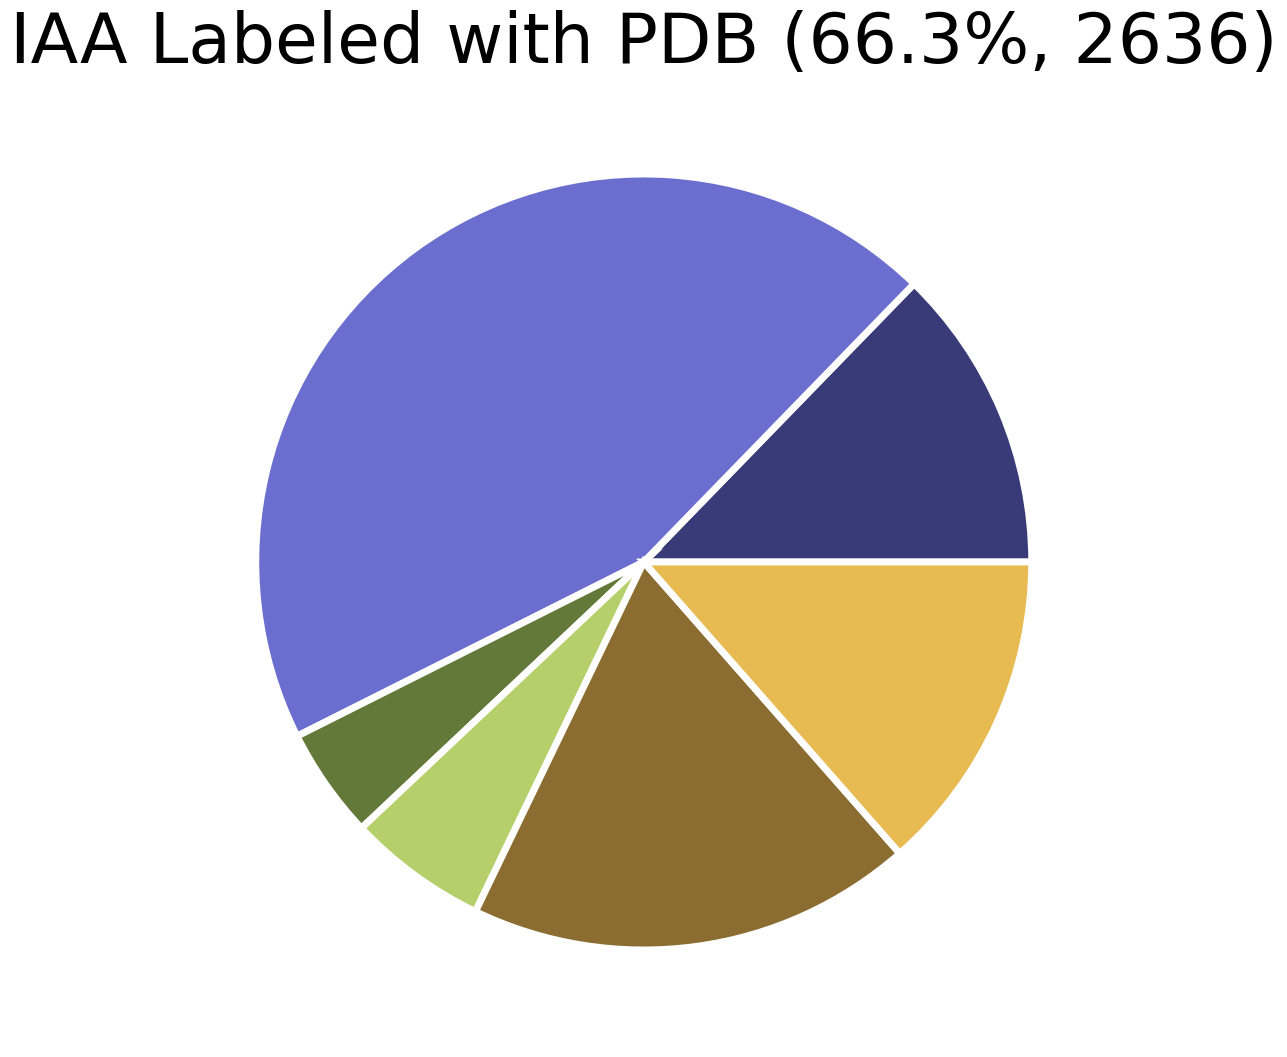

In [52]:
name = date + '_pie_total_i_pdb_kw_descr_minus_tf_white_5'
title = 'IAA Labeled with PDB (' + str(i_pdb_u_proteins) + '%, ' + str(i_pdb_proteins) + ')'
fig_df = i_pdb.copy()
labels = sorted(list(fig_df['Classification'].value_counts().index))
values = list(fig_df['Classification'].value_counts().sort_index())
get_new_pie_chart(labels, values, name, title)

In [53]:
labels, values

(['Chaperone, Transporter, Channel, Receptor',
  'Enzyme',
  'Nucleic Acid and Small Molecule Binding',
  'Scaffolding, Modulator, Adaptor',
  'Transcriptional Factor, Regulator',
  'Uncategorized'],
 [876, 3075, 318, 401, 1281, 931])

In [36]:
i_no_pdb = i_merged[i_merged['PDB'].isna() == True]
i_no_pdb_proteins = len(list(i_no_pdb['protein'].drop_duplicates()))
# i_pdb.to_csv('i_pdb_proteins.csv')

In [37]:
i_no_pdb_u_proteins = (len(protein_no_pdb_ids)/len(protein_ids)) * 100
i_no_pdb_u_proteins = round(i_no_pdb_proteins, 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


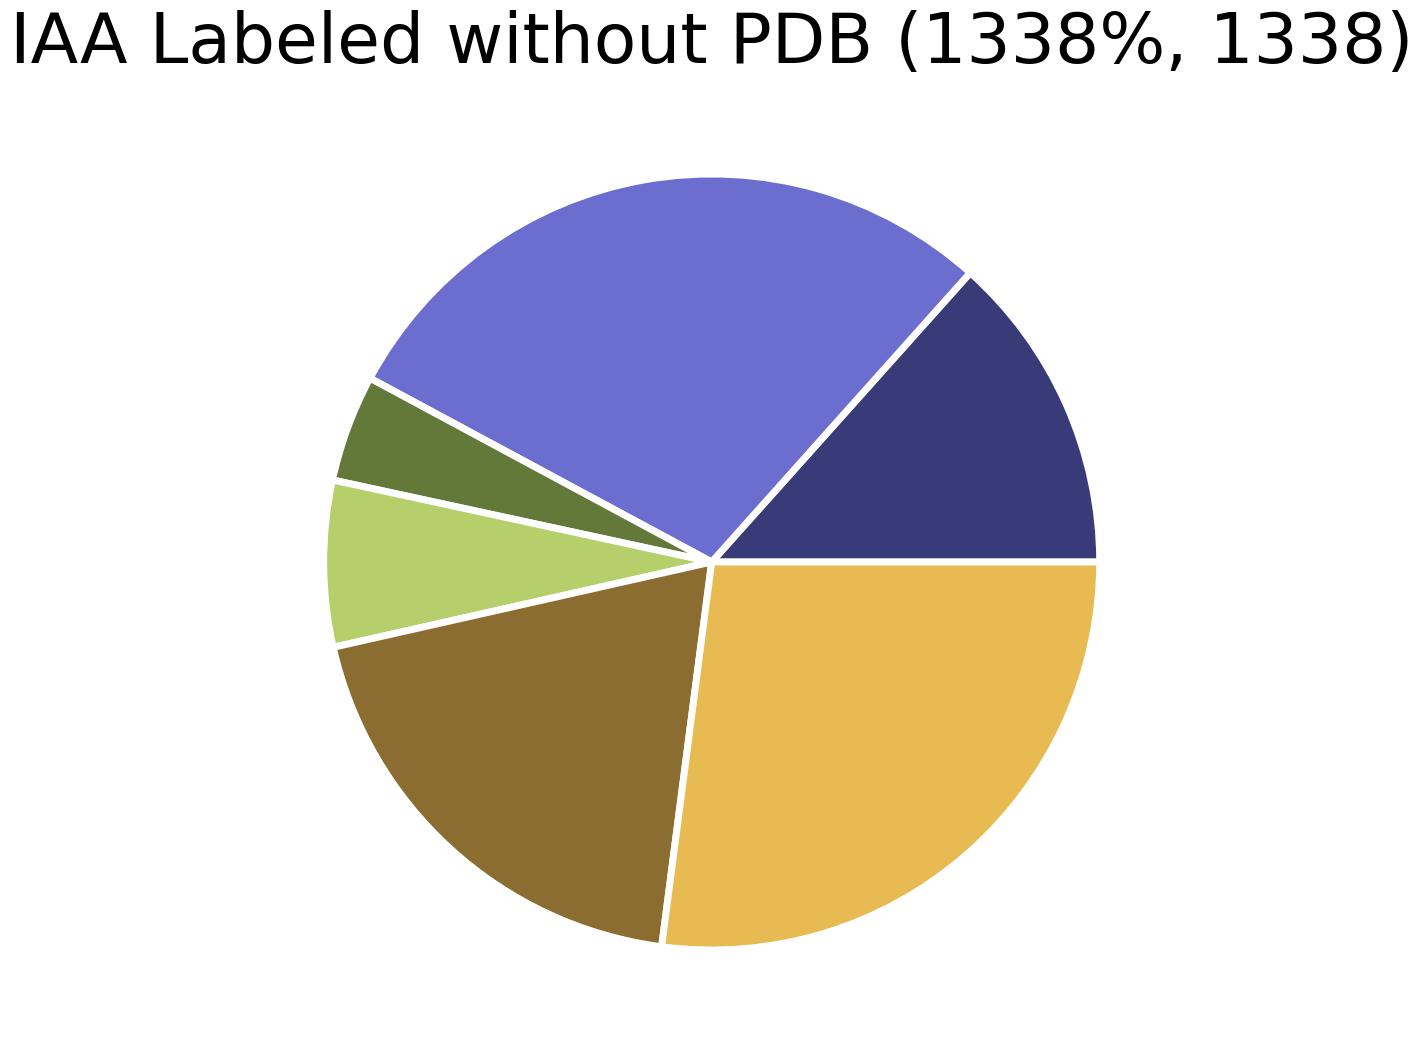

In [48]:
name = date + '_pie_total_i_no_pdb_kw_descr_minus_tf_white_5'
title = 'IAA Labeled without PDB (' + str(i_no_pdb_u_proteins) + '%, ' + str(i_no_pdb_proteins) + ')'
fig_df = i_no_pdb.copy()
labels = sorted(list(fig_df['Classification'].value_counts().index))
values = list(fig_df['Classification'].value_counts().sort_index())
get_new_pie_chart(labels, values, name, title)

In [49]:
labels, values

(['Chaperone, Transporter, Channel, Receptor',
  'Enzyme',
  'Nucleic Acid and Small Molecule Binding',
  'Scaffolding, Modulator, Adaptor',
  'Transcriptional Factor, Regulator',
  'Uncategorized'],
 [387, 831, 129, 200, 561, 782])

In [41]:
h_i_pdb = i_pdb[i_pdb['mean'] <= 2.3]
h_i_pdb_proteins = len(list(h_i_pdb['protein'].drop_duplicates()))
# i_pdb.to_csv('i_pdb_proteins.csv')

In [45]:
h_i_pdb_u_proteins = ((h_i_pdb_proteins)/len(protein_pdb_ids)) * 100
h_i_pdb_u_proteins = round(h_i_pdb_u_proteins, 1)
h_i_pdb_u_proteins

18.3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


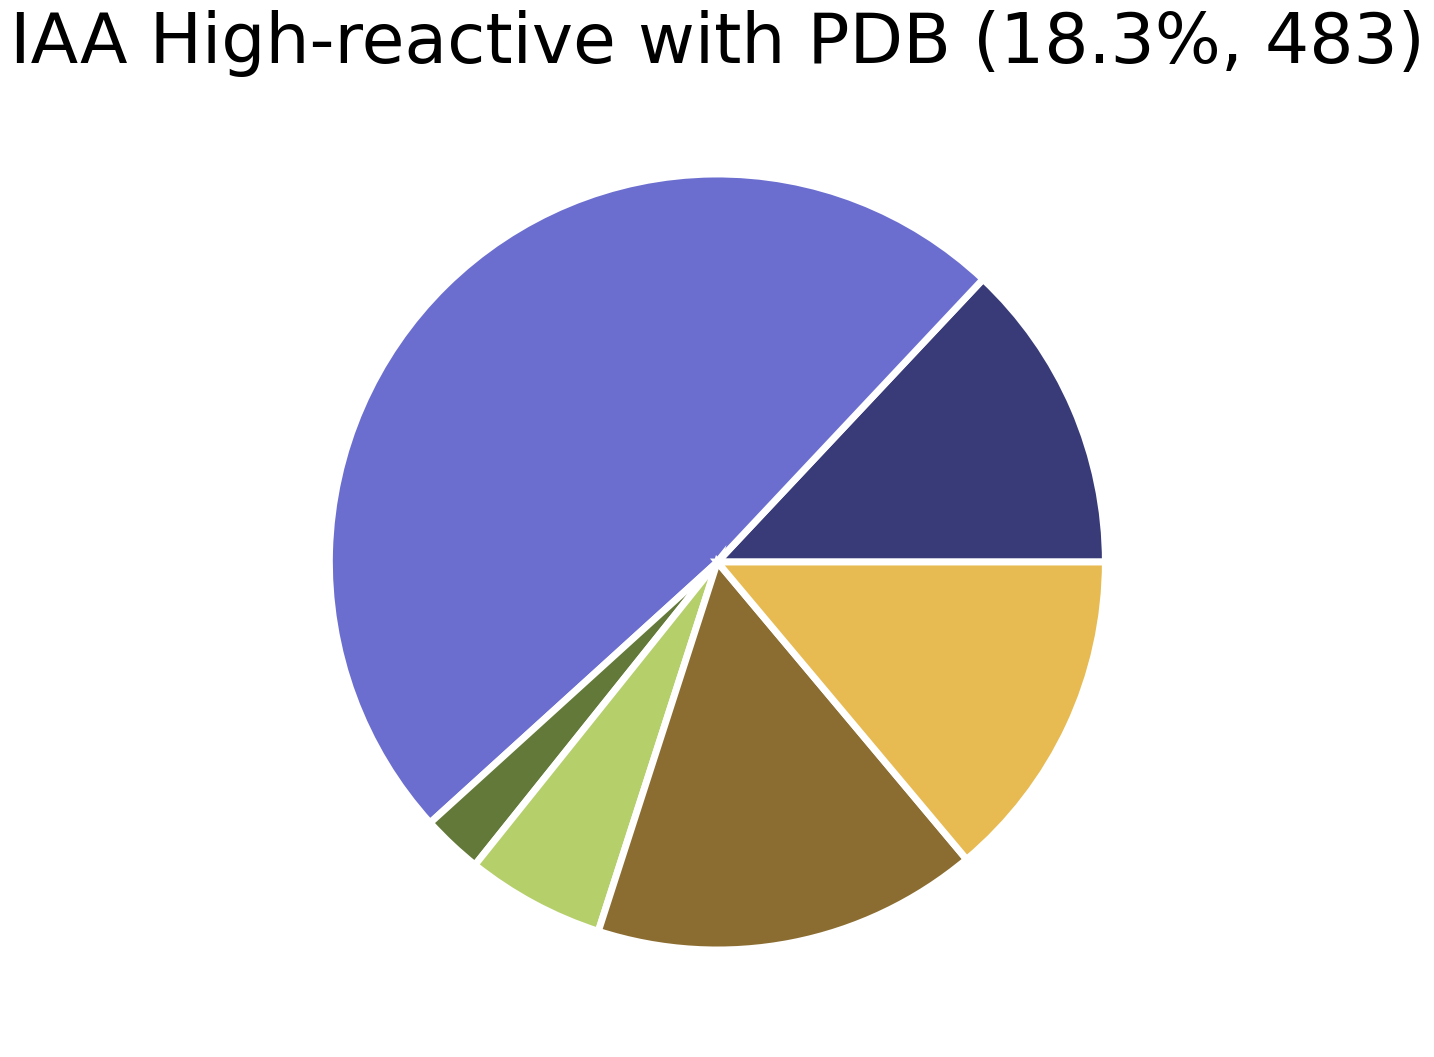

In [52]:
name = date + '_pie_total_i_h_pdb_kw_descr_minus_tf_white_5'
title = 'IAA High-reactive with PDB (' + str(h_i_pdb_u_proteins) + '%, ' + str(h_i_pdb_proteins) + ')'
fig_df = h_i_pdb.copy()
labels = sorted(list(fig_df['Classification'].value_counts().index))
values = list(fig_df['Classification'].value_counts().sort_index())
get_new_pie_chart(labels, values, name, title)

In [49]:
labels, values

(['Chaperone, Transporter, Channel, Receptor',
  'Enzyme',
  'Nucleic Acid and Small Molecule Binding',
  'Scaffolding, Modulator, Adaptor',
  'Transcriptional Factor, Regulator',
  'Uncategorized'],
 [72, 270, 14, 32, 89, 77])

In [46]:
l_i_pdb = i_pdb[i_pdb['mean'] >= 10]
l_i_pdb_proteins = len(list(l_i_pdb['protein'].drop_duplicates()))
# i_pdb.to_csv('i_pdb_proteins.csv')

In [47]:
l_i_pdb_u_proteins = ((l_i_pdb_proteins)/len(protein_pdb_ids)) * 100
l_i_pdb_u_proteins = round(l_i_pdb_u_proteins, 1)
l_i_pdb_u_proteins

21.4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


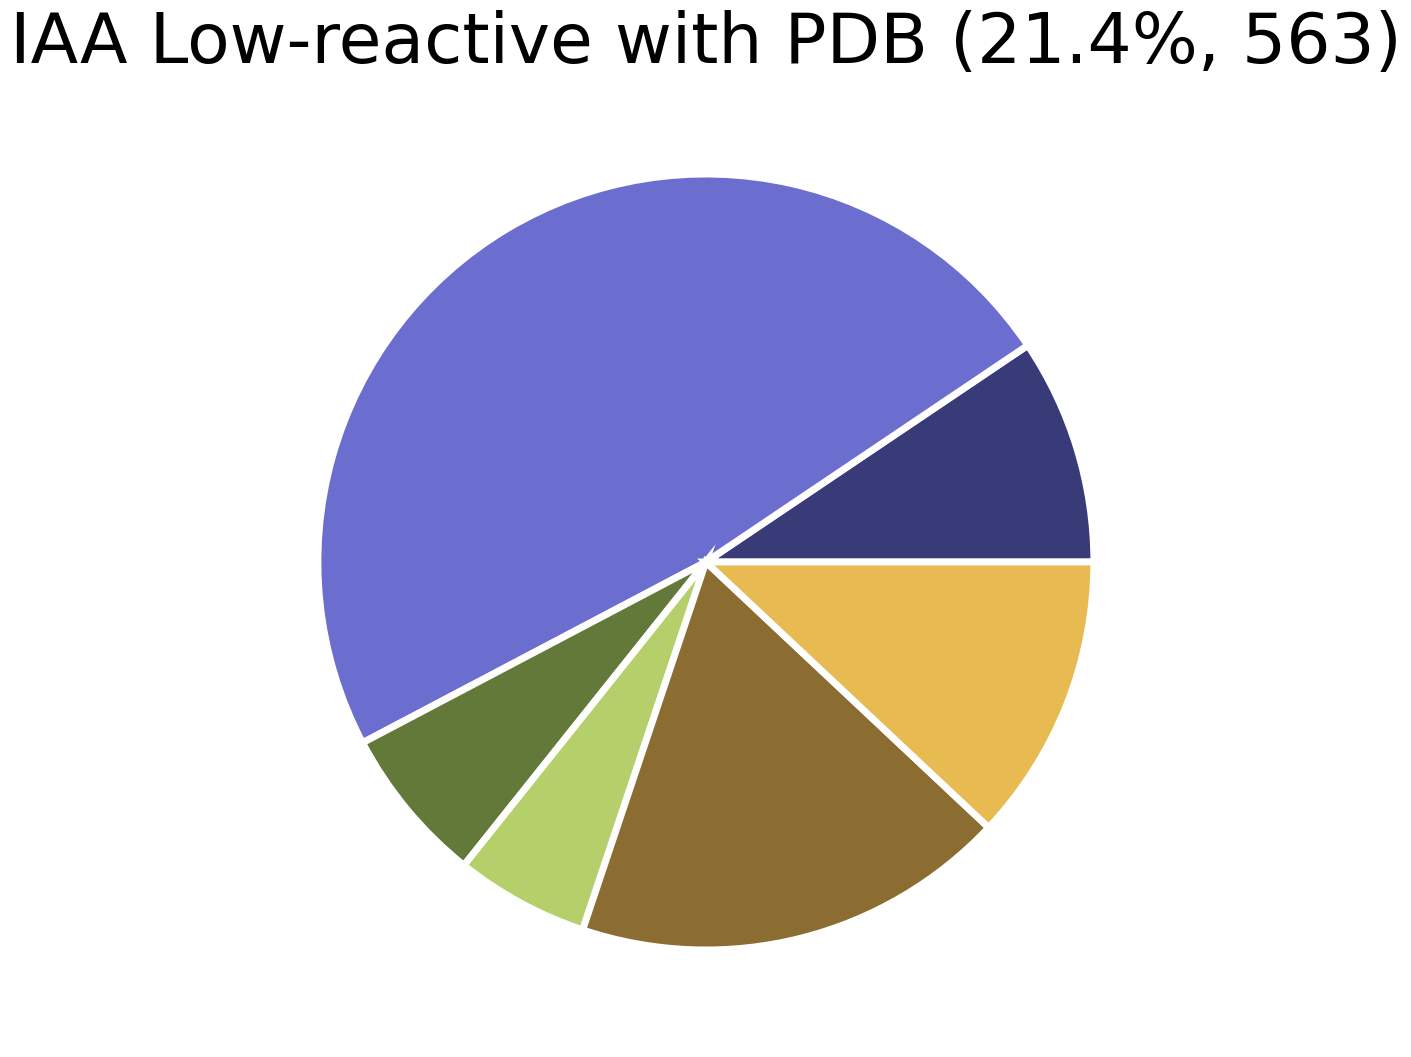

In [50]:
name = date + '_pie_total_i_l_pdb_kw_descr_minus_tf_white_5'
title = 'IAA Low-reactive with PDB (' + str(l_i_pdb_u_proteins) + '%, ' + str(l_i_pdb_proteins) + ')'
fig_df = l_i_pdb.copy()
labels = sorted(list(fig_df['Classification'].value_counts().index))
values = list(fig_df['Classification'].value_counts().sort_index())
get_new_pie_chart(labels, values, name, title)

In [51]:
labels, values

(['Chaperone, Transporter, Channel, Receptor',
  'Enzyme',
  'Nucleic Acid and Small Molecule Binding',
  'Scaffolding, Modulator, Adaptor',
  'Transcriptional Factor, Regulator',
  'Uncategorized'],
 [66, 338, 46, 39, 127, 84])

In [53]:
66/563, 338/563, 46/563, 39/563, 127/563, 84/563

(0.1172291296625222,
 0.6003552397868561,
 0.08170515097690942,
 0.06927175843694494,
 0.2255772646536412,
 0.1492007104795737)

In [54]:
72/483, 270/483, 14/483, 32/483, 89/483, 77/483

(0.14906832298136646,
 0.5590062111801242,
 0.028985507246376812,
 0.06625258799171843,
 0.18426501035196688,
 0.15942028985507245)

In [126]:
os.getcwd()

'C:\\Users\\Onee-sama\\Dropbox\\Backus\\master\\isotop'

In [79]:
os.chdir('../data')

In [80]:
i_merged.to_csv('230109_isotop_pdb.csv', index = False)